# Guided Project: Finding the Best Markets to Advertise In

In this guided project, we will assume a role in an e-learning company like Dataquest.io and try to find the two best markets to advertise our product in. Let's assume that most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

Instead of going out and organizing surveys, which would be costly and time consuming, we will use data from [freeCodeCamp's 2017 New Coder Survey](https://github.com/freeCodeCamp/2017-new-coder-survey). This data is from a survey conducted by freeCodeCamp in 2016 from more than 15,000 respondents who are trying to learn how to program.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Is this a good source of data?

In terms of advertising, it is important to know some things about potential customers. Things such as where are the areas with the greatest number of people who would use your service and how much would they potentially spend. These are important to maximize efficiency. It is also important to know if the data you are analyzing pertains to customers that you are trying to advertise to.  

In [2]:
jri_freq = data['JobRoleInterest'].value_counts(normalize=True)*100
print(jri_freq)

Full-Stack Web Developer                                                                                                                                                                                                                               12.015810
  Front-End Web Developer                                                                                                                                                                                                                               4.426877
  Data Scientist                                                                                                                                                                                                                                        2.371542
  Mobile Developer                                                                                                                                                                                                                   

We can see that 12% of respondents want to be Full-Stack Web Developers, followed by 4.4% that want to be Front-End Web Developers, and 2.4% want to be data scientists. There are very few responses interested in other roles outside of web and mobile developers.

The frequency distribution chart above is very long, 732 entries in fact. This is due to the fact that each respondent can choose more than one choice in what job roles they have interest for. For example one respondent can choose just 'Full-Stack Web Developer' as a job they are interested in, another can choose 'Full-Stack Web Developer' and 'Mobile Developer', another can choose 3 different jobs they are interested in, in different combinations. So it is best to reduce these into number of job roles selected rather than full titles. 

In [3]:
interests_no_nulls = data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

n_of_options = splitted_interests.apply(lambda x: len(x)) 
n_of_options.value_counts(normalize = True).sort_index() * 100

1     27.272727
2     12.569170
3     18.023715
4     16.521739
5     12.332016
6      6.719368
7      3.320158
8      1.185771
9      1.106719
10     0.474308
11     0.237154
12     0.237154
Name: JobRoleInterest, dtype: float64

Based on this new frequency chart, approximately 27.3 percent of respondents have a clear idea of what job roles they want. However, as our fictional business offer courses predominately in web and mobile development, we should check how many responses include web or mobile developement. 

True     87.98419
False    12.01581
Name: JobRoleInterest, dtype: float64


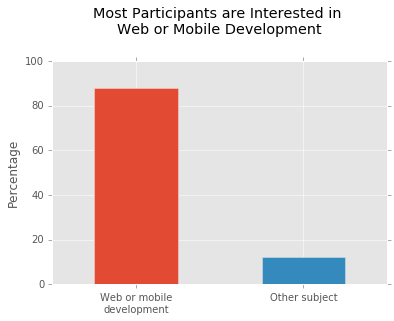

In [4]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

freq_table.plot.bar()
freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development', y = 1.10)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'], rotation = 0) 
plt.ylim([0,100])
plt.show()

As we can see about 88% of the respondents are interested in either web or mobile development. Since we are trying to find out information that would help us advertise to people who are trying to be web or mobile developers (our population of interest), this data is a good sample of the people we are trying to reach.  


## Getting what we need from the data.

As said before, to know where and how much to allocate resources to advertise, we need to know: 
* Where potential customers are located.
* Where are there the greatest amount of potential customers located.
* How much they are willing to spend, so we can price accordingly.

In [5]:
data_good = data[data['JobRoleInterest'].notnull()].copy()

absfreq = data_good['CountryLive'].value_counts()
relfreq = data_good['CountryLive'].value_counts(normalize=True) * 100

pd.DataFrame(data={'Absolute Frequency' : absfreq,
                  'Percentage': relfreq})

,Absolute Frequency,Percentage
United States of America,620,50.000000
India,105,8.467742
United Kingdom,64,5.161290
Canada,49,3.951613
Germany,26,2.096774
Poland,24,1.935484
Brazil,23,1.854839
Australia,19,1.532258
Romania,14,1.129032
Russia,13,1.048387


The top markets are:
* The United States
* India
* The UK
* Canada

Now that we know where our potential customers are, we should find out how much they are willing to pay -- if they are willing to pay at all.

In [6]:
# Replace 0s to prevent dividing by 0
data_good['MonthsProgramming'].replace(to_replace=0.0, value=1, inplace=True)

data_good['SpentPerMonth'] = data_good['MoneyForLearning']/data_good['MonthsProgramming']

data_good['SpentPerMonth'].isnull().sum()


122

In [7]:
data_good2 = data_good[data_good['SpentPerMonth'].notnull()].copy()
data_good2['SpentPerMonth'].isnull().sum()


0

In [8]:
data_good3 = data_good2[data_good2['CountryLive'].notnull()].copy()
data_good3['CountryLive'].isnull().sum()

0

In [9]:
countries_mean = data_good3.groupby(by='CountryLive').mean()
countries_mean['SpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    262.466988
India                       119.467205
United Kingdom               18.921319
Canada                       35.808258
Name: SpentPerMonth, dtype: float64

It is some what surprising how much India spends compared to the United Kingdom or Canada when looking at the respective countries GDP per capita. You would expect the UK and Canada to spend more. This is something we should look more in depth to.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


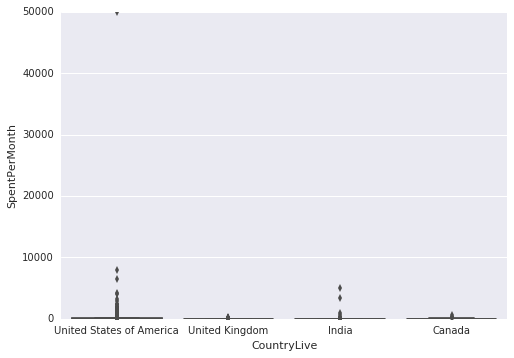

In [10]:
import seaborn as sns

only_4 = data_good3[data_good3['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
sns.boxplot(y = 'SpentPerMonth', x = 'CountryLive',
            data = only_4)

There seems to be some problems with the data. It shows someone in the United States spends $50,000 per month on learning programming, this might be a mistake. We will remove it and check the graph again.

In [11]:
data_good = data_good3[data_good3['SpentPerMonth'] < 10000]


In [12]:
countries_mean = data_good.groupby('CountryLive').mean()
countries_mean['SpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    176.860219
India                       119.467205
United Kingdom               18.921319
Canada                       35.808258
Name: SpentPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


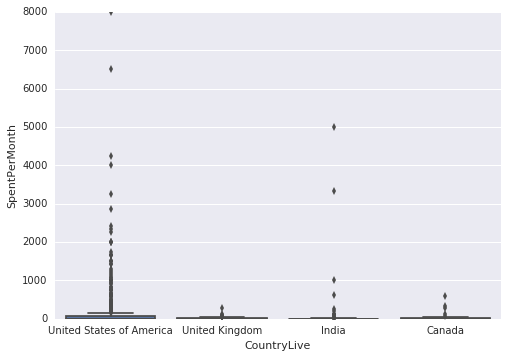

In [13]:
only_4 = data_good[data_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
sns.boxplot(y = 'SpentPerMonth', x = 'CountryLive',
            data = only_4)

There are some extreme outliers from India and the US, however it could be due to these people attending multiple bootcamps which could add up to be very expensive. Let take a closer look at the outliers.

In [14]:
only_4[(only_4['CountryLive'] == 'India') & (only_4['SpentPerMonth'] > 3000)]


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333


It appears that they did not attend bootcamps, however they could have misinterpret the question and included university tuition, we should remove these two rows and move on.

In [15]:
only_4 = only_4.drop([1728,1755])

In [16]:
only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['SpentPerMonth'] > 6000)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpentPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.0
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.0


For these two rows, it seems that they did infact attend a bootcamp, however they have yet to complete it. They most likely responded with the full price of the bootcamp and the couple months they have spent programming which threw off the calculation. We will also remove these rows. 

In [17]:
only_4 = only_4.drop([718,1222]) # using the row labels from above


In [20]:
only_4.groupby('CountryLive').mean()['SpentPerMonth']


CountryLive
Canada                       35.808258
India                        29.529439
United Kingdom               18.921319
United States of America    152.427957
Name: SpentPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


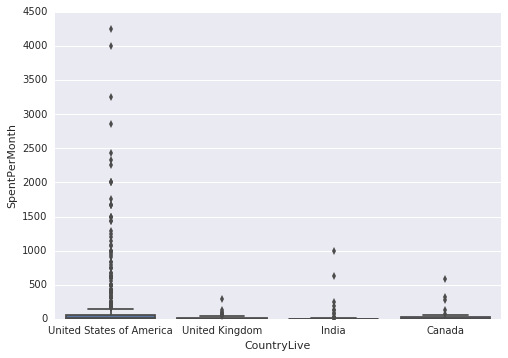

In [21]:
sns.boxplot(y = 'SpentPerMonth', x = 'CountryLive',
            data = only_4)

So it apparent that we should advertise in the United States, a place with a lot of people trying to learn to program and are willing to pay. However, which of the three other countries should we advertise in? Based on the frequency chart above, we should advertise in Canada as the mean priced paid is closes to our $59 monthly subscription. However we should figure in the variability of each distribution before making any conclusions.

In [24]:
for country in ['India', 'Canada', 'United Kingdom']:
    one_country = only_4[only_4['CountryLive'] == country]
    mean = one_country['SpentPerMonth'].mean()
    st_dev = one_country['SpentPerMonth'].std(ddof = 1)
    z = (59 - mean) / st_dev
    print(country + ': ' + str(z))

India: 0.23015037592003365
Canada: 0.21909241155098425
United Kingdom: 0.8967313005116765


Based on the z-score from above, we can remove the United Kingdom from our list of potential areas to advertise in. We are left with India and Canada. Although Canada's z-score is lower, India would have more potential customers. 

In [25]:
only_4['CountryLive'].value_counts()


United States of America    579
India                        90
United Kingdom               58
Canada                       45
Name: CountryLive, dtype: int64

Given that amount of people from the United States that are willing to pay to learn programming, more of our advertising resources should go towards the US. The question remains however if we should use the remainder to advertise in just India or to advertise in both India and Canada. This is outside the realm of our knowledge, and we should pass on our analysis to a marketing team who can make better use of this knowledge.

# Conclusion
In this project, we concluded that the United States was one of the two countries that we should advertise in given the market size and customer potential to spend. However, we did not find a clear cut answer to the second country we should advertise in, with the top two answers being India and Canada. If possible, we should pass this analysis on to the marketing team and let their expertise make better use of our information.